Loading and preprocessing the dataset...

Dataset Preview:
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090

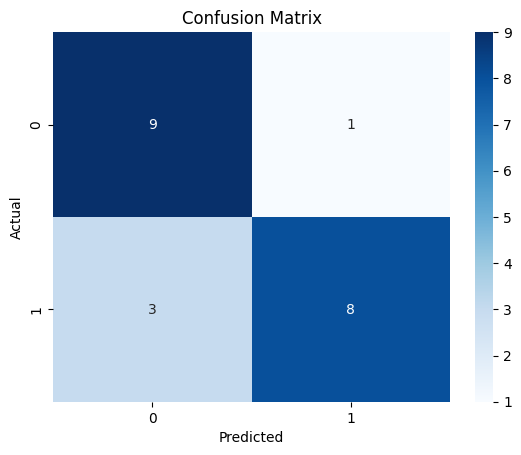


Making a prediction...
The object is a Mine


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
print("Loading and preprocessing the dataset...")
sonar_data = pd.read_csv('/content/sonar.all-data', header=None)

# Display basic information about the dataset
print("\nDataset Preview:")
print(sonar_data.head())
print(f"\nDataset Shape: {sonar_data.shape}")
print("\nDataset Description:")
print(sonar_data.describe())

# Check class distribution
print("\nClass Distribution:")
print(sonar_data[60].value_counts())

# M --> Mine, R --> Rock
print("\nMean values for each class:")
print(sonar_data.groupby(60).mean())

# Separate features (X) and labels (Y)
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

# Encode labels ('R' as 0, 'M' as 1)
Y = Y.map({'R': 0, 'M': 1})

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
print(f"\nData Shapes - Features: {X.shape}, Training: {X_train.shape}, Test: {X_test.shape}")

# Train the Logistic Regression model
print("\nTraining the Logistic Regression model...")
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# Evaluate the model
print("\nEvaluating the model...")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, train_predictions)
test_accuracy = accuracy_score(Y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Display detailed metrics
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

# Confusion matrix visualization
conf_matrix = confusion_matrix(Y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predictive system for a single instance
print("\nMaking a prediction...")
input_data = (
    0.0272, 0.0378, 0.0488, 0.0848, 0.1127, 0.1103, 0.1349, 0.2337, 0.3113, 0.3997,
    0.3941, 0.3309, 0.2926, 0.1760, 0.1739, 0.2043, 0.2088, 0.2678, 0.2434, 0.1839,
    0.2802, 0.6172, 0.8015, 0.8313, 0.8440, 0.8494, 0.9168, 1.0000, 0.7896, 0.5371,
    0.6472, 0.6505, 0.4959, 0.2175, 0.0990, 0.0434, 0.1708, 0.1979, 0.1880, 0.1108,
    0.1702, 0.0585, 0.0638, 0.1391, 0.0638, 0.0581, 0.0641, 0.1044, 0.0732, 0.0275,
    0.0146, 0.0091, 0.0045, 0.0043, 0.0043, 0.0098, 0.0054, 0.0051, 0.0065, 0.0103
)

# Convert input data to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_as_numpy_array)
if prediction[0] == 0:
    print("The object is a Rock")
else:
    print("The object is a Mine")
